In [1]:
import tensorflow as tf
import pickle
import numpy as np
import timeit
#import HW2_4a_template as data_source
from tensorflow.contrib.layers import flatten
import matplotlib.pyplot as plt
import cv2

<h1>Load training, validation, testing set from your preprocessed files</h1>

In [55]:
batch_size = 25
def mini_batch(features,labels,mini_batch_size):
    """
    Args:
        features: features for one batch
        labels: labels for one batch
        mini_batch_size: the mini-batch size you want to use.
    Hint: Use "yield" to generate mini-batch features and labels
    """
    #split the data into batches
    amount_of_data = len(features)
    number_of_bunches = amount_of_data/mini_batch_size
    
    bunches_features = []
    bunches_labels = []
    
    #loop over breaking the data into batches
    for i in range(int(number_of_bunches)):
        current_range = i * mini_batch_size
        f_b = features[current_range:current_range+mini_batch_size]
        l_b = labels[current_range:current_range+mini_batch_size]
        
        bunches_features.append(f_b)
        bunches_labels.append(l_b)
    
    #return the mini-batched data
    return bunches_features, bunches_labels


#set the training, validation, and testing data
train_set = []
valid_set = []
test_set_data = []
   
with open("cats_dogs_train1", 'rb') as handle:
    b = pickle.load(handle)
train_set = train_set + b

with open("cats_dogs_train2", 'rb') as handle:
    b = pickle.load(handle)
train_set = train_set + b
    
with open("cats_dogs_train3", 'rb') as handle:
    b = pickle.load(handle)
train_set = train_set + b
    
with open("cats_dogs_train4", 'rb') as handle:
    b = pickle.load(handle)
train_set = train_set + b
    
with open("cats_dogs_train5", 'rb') as handle:
    b = pickle.load(handle)
train_set = train_set + b
    
with open("cats_dogs_valid", 'rb') as handle:
    b = pickle.load(handle)
valid_set = b

with open("cats_dogs_test", 'rb') as handle:
    b = pickle.load(handle)
test_set_data = b
    
    
train_set_data = []
train_set_labels = []
valid_set_data = []
valid_set_labels = []
test_set_labels = []

for i in range(len(train_set)):
    train_set_data.append(train_set[i][0])
    train_set_labels.append(train_set[i][1])
    
for i in range(len(valid_set)):
    valid_set_data.append(valid_set[i][0])
    valid_set_labels.append(valid_set[i][1])
    
test_set_labels = [[1,0]] * len(test_set_data)
    
train_set_data, train_set_labels = mini_batch(train_set_data,train_set_labels,batch_size)
valid_set_data, valid_set_labels = mini_batch(valid_set_data,valid_set_labels,batch_size)
test_set_data, test_set_labels = mini_batch(test_set_data,test_set_labels,batch_size)



<h1>Define hyperparameter</h1>

In [56]:
#learning rate
lr = 0.0001
#number of traning steps
num_steps = 10
#number of batch_size
#batch_size = 500
#num_input = 784
num_classes = 2

num_train_batches = int(55000 / batch_size)
num_valid_batches = int(5000 / batch_size)
num_test_batches = int(10000 / batch_size)

<h1>Placeholder</h1>

In [57]:
tf.reset_default_graph()
#tf graph input
X = tf.placeholder(tf.float32,[None,227,227,3],name='X')
Y = tf.placeholder(tf.int32,[None,num_classes],name='Y')

<h1>AlexNet</h1>

In [58]:
def AlexNet(x):    
    #first conv/pool pair
    #6 num of filters
    #5 kernel size
    conv1 = tf.layers.conv2d(inputs = x, filters = 96, kernel_size = 11, strides=(4, 4), activation=tf.nn.relu)
    pool1 = tf.layers.max_pooling2d(inputs = conv1, pool_size = 3, strides = 2)
    
    
    #second conv/pool pair
    conv2 = tf.layers.conv2d(inputs = pool1, filters = 256, kernel_size = 5, strides=(1, 1), activation=tf.nn.relu, padding = "same")
    pool2 = tf.layers.max_pooling2d(conv2, 3, 2)
    
    #third fourth and fifth convs
    conv3 = tf.layers.conv2d(inputs = pool2, filters = 384, kernel_size = 3, strides=(1, 1), activation=tf.nn.relu, padding = "same")
    conv4 = tf.layers.conv2d(inputs = conv3, filters = 384, kernel_size = 3, strides=(1, 1), activation=tf.nn.relu, padding = "same")
    conv5 = tf.layers.conv2d(inputs = conv3, filters = 256, kernel_size = 3, strides=(1, 1), activation=tf.nn.relu, padding = "same")
    pool5 = tf.layers.max_pooling2d(conv5, 3, 2)
    
    
    #flatten to connect to fully connected
    full_in = flatten(pool5)
    
    #fully connected layer
    full1 = tf.contrib.layers.fully_connected(inputs=full_in, num_outputs=4096, activation_fn=tf.nn.relu)
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=4096, activation_fn=tf.nn.relu)
    logits = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=num_classes, activation_fn=None)
    return logits

<h1>Cost and Optimization</h1>

In [59]:
#predicted labels
logits = AlexNet(X)

#define loss
just_soft = tf.nn.softmax(logits=logits)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')

#define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

<h1>Training and validation</h1>
<h2>Train your model only 10 epochs</h2>
<p style="font-size:20px">1. Print out training accuracy and validation accuracy each training epoch</p>
<p style="font-size:20px">2. Print out training time each training epoch</p>
<p style="font-size:20px">3. Your goal is to reach 85% validation accuracy in 10 training epochs. If you reach that, you can perform testing, print out your test accuracy. Plot out the ten images with title that contains the probability of the labeled class.</p>

step 0, Accuracy training= 0.736
step 0, Accuracy= 0.752
step 1, Accuracy training= 0.822
step 1, Accuracy= 0.790
step 2, Accuracy training= 0.866
step 2, Accuracy= 0.822
step 3, Accuracy training= 0.909
step 3, Accuracy= 0.812
step 4, Accuracy training= 0.939
step 4, Accuracy= 0.842
step 5, Accuracy training= 0.958
step 5, Accuracy= 0.826
step 6, Accuracy training= 0.972
step 6, Accuracy= 0.854
step 7, Accuracy training= 0.982
step 7, Accuracy= 0.834
step 8, Accuracy training= 0.990
step 8, Accuracy= 0.848
step 9, Accuracy training= 0.992
step 9, Accuracy= 0.858
Training finished!
Guess: [0.99714404 0.0028559 ]


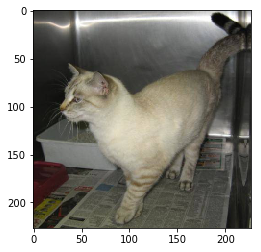

Guess: [1.0000000e+00 2.3564795e-10]


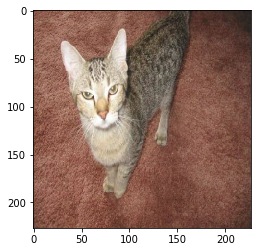

Guess: [0.8201098  0.17989023]


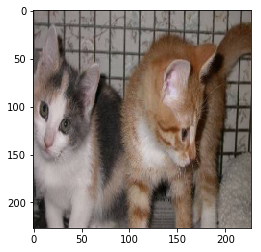

Guess: [3.1363367e-14 1.0000000e+00]


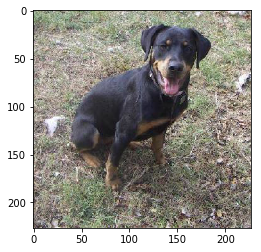

Guess: [0.97021145 0.02978855]


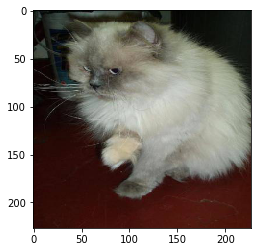

Guess: [0.8740782  0.12592183]


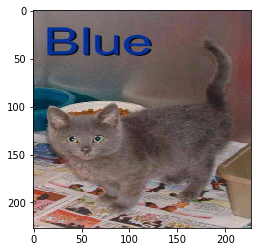

Guess: [0.00414729 0.9958527 ]


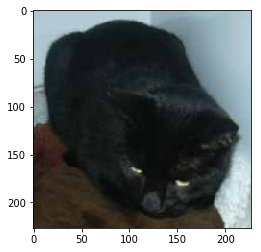

Guess: [1.000000e+00 8.990068e-09]


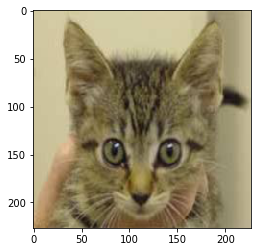

Guess: [1.3794169e-05 9.9998617e-01]


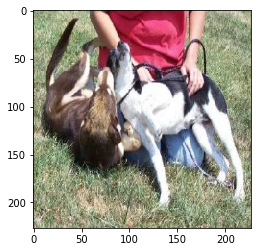

Guess: [0.86657417 0.13342583]


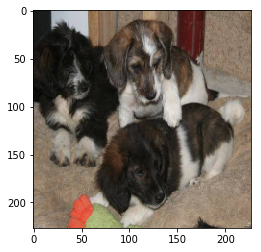

Text(0.5, 1.0, 'Epoch vs accuracy')

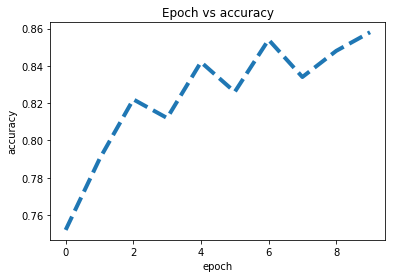

In [60]:
#Initialize the variables
init = tf.global_variables_initializer()

acc_list = []
steps = []

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        #epoch training
        acc_t = 0
        for j in range(len(train_set_data)):
            #fetch batch
            batch_x = train_set_data[j]
            #print(batch_x)
            batch_y = train_set_labels[j]
            #run optimization
            sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
            
            acc_t += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        acc_t = acc_t/len(train_set_data)
        print("step "+str(i)+", Accuracy training= {:.3f}".format(acc_t))
            
        #epoch validation
        acc = 0
        for j in range(len(valid_set_data)):
            #fetch batch
            batch_x = valid_set_data[j]
            batch_y = valid_set_labels[j]
            #run optimization
            acc += sess.run(accuracy, feed_dict={X:batch_x, Y:batch_y})
        
        acc = acc/len(valid_set_data)
        print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
        acc_list.append(acc)
        steps.append(i)
    
    print("Training finished!")
    
    #acc = 0
    #for k in range(len(test_set_data)):
    #fetch batch
    batch_x = test_set_data[0]
    batch_y = test_set_labels[0]
    #run optimization
    guesses = sess.run(just_soft, feed_dict={X:batch_x, Y:batch_y})
    
    
    for images in range(10):
        cur_img = batch_x[images]
        b,g,r = cv2.split(cur_img)
        frame_rgb = cv2.merge((r,g,b))
        plt.imshow(frame_rgb)
        print("Guess:", guesses[images])
        plt.show()

    #acc = acc/len(test_set_data)
    #print("step "+str(i)+", Accuracy= {:.3f}".format(acc))
    
    #print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    
    
plt.figure()
# plot epoch vs accuracy
plt.plot(steps,acc_list,'--',lw=4)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('Epoch vs accuracy')